<a href="https://colab.research.google.com/github/helarebah/Car-Insurance-Data/blob/main/Car_Insurance_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [19]:
df = pd.read_csv('/content/archive (3).zip')
df.head()

,ID,AGE,GENDER,RACE,DRIVING_EXPERIENCE,EDUCATION,INCOME,CREDIT_SCORE,VEHICLE_OWNERSHIP,VEHICLE_YEAR,MARRIED,CHILDREN,POSTAL_CODE,ANNUAL_MILEAGE,VEHICLE_TYPE,SPEEDING_VIOLATIONS,DUIS,PAST_ACCIDENTS,OUTCOME
0,569520,65+,female,majority,0-9y,high school,upper class,0.629027,1.0,after 2015,0.0,1.0,10238,12000.0,sedan,0,0,0,0.0
1,750365,16-25,male,majority,0-9y,none,poverty,0.357757,0.0,before 2015,0.0,0.0,10238,16000.0,sedan,0,0,0,1.0
2,199901,16-25,female,majority,0-9y,high school,working class,0.493146,1.0,before 2015,0.0,0.0,10238,11000.0,sedan,0,0,0,0.0
3,478866,16-25,male,majority,0-9y,university,working class,0.206013,1.0,before 2015,0.0,1.0,32765,11000.0,sedan,0,0,0,0.0
4,731664,26-39,male,majority,10-19y,none,working class,0.388366,1.0,before 2015,0.0,0.0,32765,12000.0,sedan,2,0,1,1.0


What is the target?

Our target is the vehicule type

What does one row represent?

A person

How many features does the data have?

In [20]:
len(df.columns)

19

We have 18 features because we're not counting the column 'ID'

How many rows are in the dataset?

In [21]:
df.shape[0]

10000

We have 10000 rows

What, if any, challenges do you foresee in cleaning, exploring, or modeling this dataset?

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10000 non-null  int64  
 1   AGE                  10000 non-null  object 
 2   GENDER               10000 non-null  object 
 3   RACE                 10000 non-null  object 
 4   DRIVING_EXPERIENCE   10000 non-null  object 
 5   EDUCATION            10000 non-null  object 
 6   INCOME               10000 non-null  object 
 7   CREDIT_SCORE         9018 non-null   float64
 8   VEHICLE_OWNERSHIP    10000 non-null  float64
 9   VEHICLE_YEAR         10000 non-null  object 
 10  MARRIED              10000 non-null  float64
 11  CHILDREN             10000 non-null  float64
 12  POSTAL_CODE          10000 non-null  int64  
 13  ANNUAL_MILEAGE       9043 non-null   float64
 14  VEHICLE_TYPE         10000 non-null  object 
 15  SPEEDING_VIOLATIONS  10000 non-null  

We have missing values in the column 'ANNUAL_MILEAGE' and some columns need to have the type integer but they are object, so they need to be changed.
Also, we need to check for inconsistant data and duplicated rows.

Explore/clean the data

In [23]:
df.duplicated().sum()

0

In [24]:
df['AGE'] = pd.to_numeric(df['AGE'], errors='coerce')
df['DRIVING_EXPERIENCE'] = pd.to_numeric(df['DRIVING_EXPERIENCE'], errors='coerce')

In [25]:
df['ANNUAL_MILEAGE'] = df['ANNUAL_MILEAGE'].fillna('missing')

In [26]:
for column in df.columns:
    print(f"Unique values for {column}:")
    unique_values = df[column].unique()
    print(unique_values)
    print('-' * 40) # so we can have a separation

Unique values for ID:
[569520 750365 199901 ... 468409 903459 442696]
----------------------------------------
Unique values for AGE:
[nan]
----------------------------------------
Unique values for GENDER:
['female' 'male']
----------------------------------------
Unique values for RACE:
['majority' 'minority']
----------------------------------------
Unique values for DRIVING_EXPERIENCE:
[nan]
----------------------------------------
Unique values for EDUCATION:
['high school' 'none' 'university']
----------------------------------------
Unique values for INCOME:
['upper class' 'poverty' 'working class' 'middle class']
----------------------------------------
Unique values for CREDIT_SCORE:
[0.62902731 0.35775712 0.49314579 ... 0.47094023 0.36418478 0.43522478]
----------------------------------------
Unique values for VEHICLE_OWNERSHIP:
[1. 0.]
----------------------------------------
Unique values for VEHICLE_YEAR:
['after 2015' 'before 2015']
--------------------------------------

Exploratory Visualizations
Creating exploratory visualizations to understand your data and search for trends.

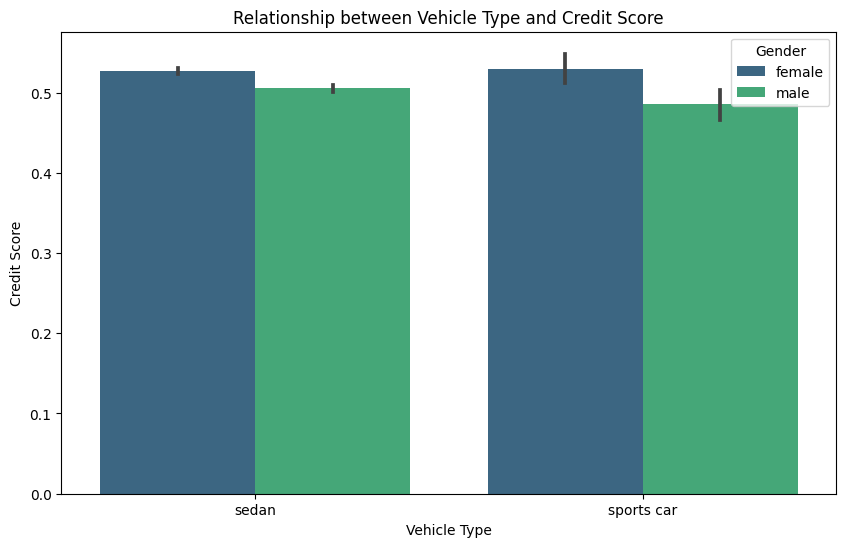

In [39]:
plt.figure(figsize=(10, 6))
sns.barplot(x='VEHICLE_TYPE', y='CREDIT_SCORE', hue='GENDER', data=df, palette='viridis')
plt.title('Relationship between Vehicle Type and Credit Score')
plt.xlabel('Vehicle Type')
plt.ylabel('Credit Score')
plt.legend(title='Gender')
plt.show()

Create Explanatory Visualizations
Select two features from your EDA and produce explanatory visualizations showing the relationship between the feature and the target.

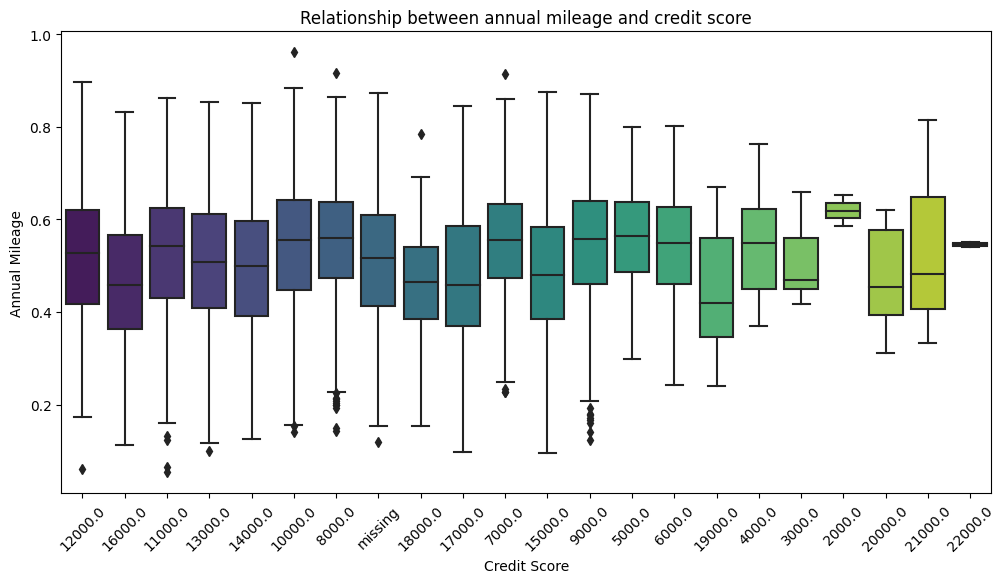

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x=df['ANNUAL_MILEAGE'], y=df['CREDIT_SCORE'], data=df, palette='viridis')
plt.title('Relationship between annual mileage and credit score')
plt.xlabel('Credit Score')
plt.ylabel('Annual Mileage')
plt.xticks(rotation=45)
plt.show()